In [58]:
%matplotlib ipympl

In [13]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from h3_helper import *

## Elevation raster 

In [9]:
raster = os.path.dirname(os.getcwd()) + r"/data/eesti_clipped/small_extent/MeritDEM90m.tif"

In [10]:
h3_el_11 = raster_to_h3(raster, 'elevation', 8, 12, [26.521263, 58.283163, 26.900083, 58.505180], 3)

Raster pixel size 92.6624388709314
11
Start filling raster extent with h3 indexes at resolution 11
Start getting raster values for hexes at resolution 11


In [17]:
h3_el_11 = create_h3_geometry(h3_cor_11)

In [18]:
h3_el_10 = cell_h3_downsampling(h3_el_11,'cell_id','elevation',10,'numeric')
h3_el_10 = create_h3_geometry(h3_el_10)

In [19]:
h3_el_9 = cell_h3_downsampling(h3_el_11,'cell_id','elevation',9,'numeric')
h3_el_9 = create_h3_geometry(h3_el_9)

In [20]:
h3_el_8 = cell_h3_downsampling(h3_el_11,'cell_id','elevation',8,'numeric')
h3_el_8 = create_h3_geometry(h3_el_8)

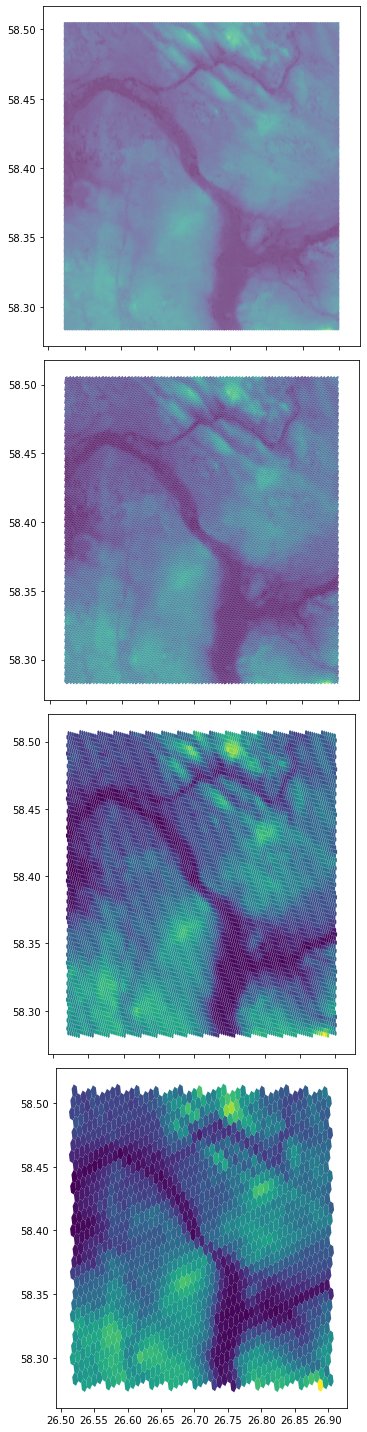

In [35]:
fig, ax = plt.subplots(4,1,figsize=(7,20),sharex='col')
h3_el_11.plot(column='elevation',ax=ax[0])
h3_el_10.plot(column='elevation',ax=ax[1])
h3_el_9.plot(column='elevation',ax=ax[2])
h3_el_8.plot(column='elevation',ax=ax[3])
plt.tight_layout()

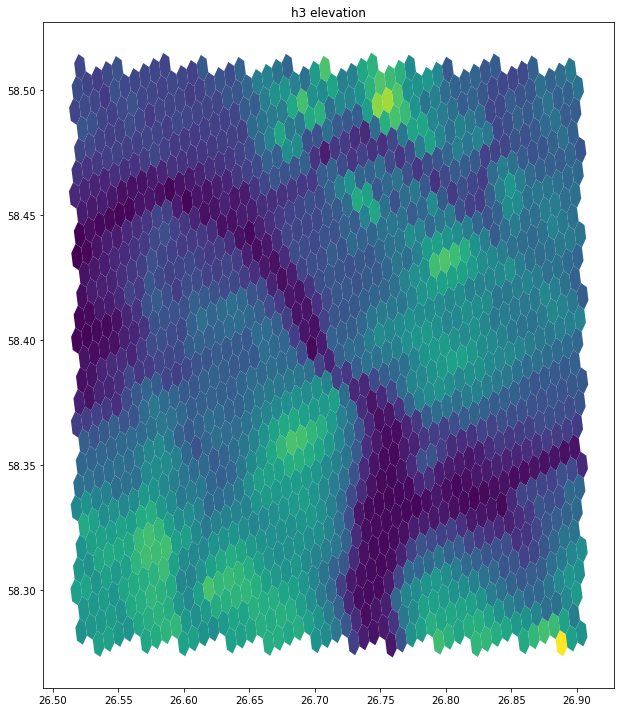

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
h3_el_8.plot(column='elevation',ax=ax)
ax.set_title('h3 elevation')
plt.tight_layout()

## Corine landcover vector

In [22]:
vector = os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\CorineEestiWGS84.gpkg'

In [23]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'/data/eesti_clipped/land_cover/corine_legend.pkl')

In [25]:
h3_cor_11 = vector_to_h3(vector,'code_18',11,[26.521263, 58.283163, 26.900083, 58.505180])

Start filling raster extent with h3 indexes at resolution 11


In [30]:
h3_cor_11 = create_h3_geometry(h3_cor_11)

In [31]:
h3_cor_10 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',10,'categorical')
h3_cor_10 = create_h3_geometry(h3_cor_10)

In [32]:
h3_cor_9 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',9,'categorical')
h3_cor_9 = create_h3_geometry(h3_cor_9)

In [33]:
h3_cor_8 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',8,'categorical')
h3_cor_8 = create_h3_geometry(h3_cor_8)

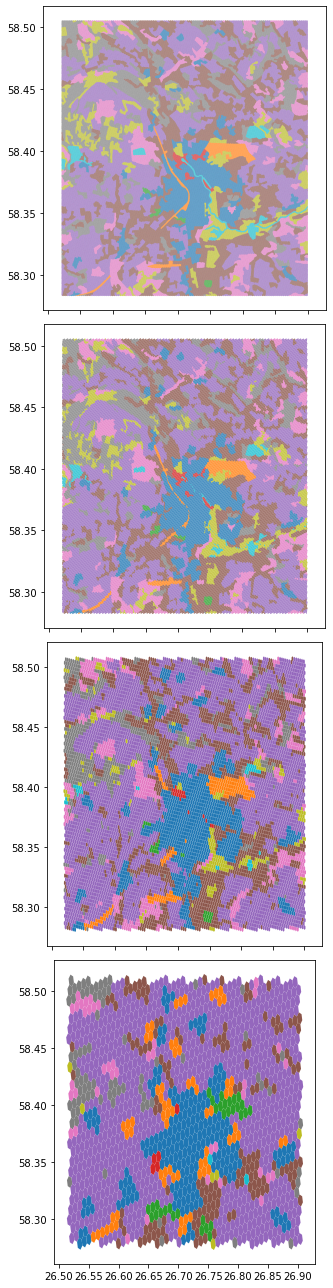

In [34]:
fig, ax = plt.subplots(4,1,figsize=(7,18),sharex='col')
h3_cor_11.plot(column='code_18',ax=ax[0])
h3_cor_10.plot(column='code_18',ax=ax[1])
h3_cor_9.plot(column='code_18',ax=ax[2])
h3_cor_8.plot(column='code_18',ax=ax[3])
plt.tight_layout()

In [22]:
h3_cor_9 = h3_cor_9.merge(corine_legend, left_on='code_18', right_on='CLC_CODE')

In [25]:
h3_cor_9 = gpd.GeoDataFrame(h3_cor_9)
h3_cor_9.crs = 'EPSG:4326'

In [229]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = ListedColormap([color.tolist() for code, color in palete.items()
                           if str(code) in h3_cor_9['code_18'].unique()])
leg_texts = h3_cor_9.sort_values(by='code_18')['LABEL3'].unique()
h3_cor_9.plot(ax=ax, column='code_18', cmap = cmap, categorical = True, legend = True, legend_kwds={'loc': 'lower center', 'ncol':2})
ax.set_title('h3 landcover')
leg = ax.get_legend()
#box = ax.get_position()
#ax.set_position([box.x0, 0.025, box.width, box.height])
for text, label in zip(leg.get_texts(), leg_texts):
    text.set_text(label)
leg.set_bbox_to_anchor((0.5, -0.6))
plt.tight_layout()
plt.show()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [151]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in h3_cor_9.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('h3 landcover')
plt.show()
plt.tight_layout()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …